In [1]:
import cv2 as cv

In [2]:
import matplotlib.pyplot as plt

def show_in_plt(img):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[:,:,[2, 1, 0]])

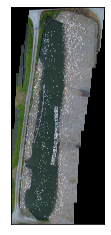

In [3]:
img = cv.imread('full_duck.jpg')
show_in_plt(img)

In [67]:
height, width = img.shape[:2]
print(height, width)

13816 5946


In [70]:
import random

seed_v = random.random()
seed_h = random.random()

fetch_v_begin = int(seed_v * (height-500))
fetch_h_begin = int(seed_h * (width-500))

print(fetch_v_begin, fetch_h_begin)

12525 2439


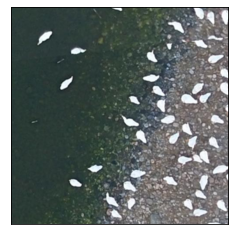

In [71]:
img_fetch = img[fetch_v_begin:fetch_v_begin+500, fetch_h_begin:fetch_h_begin+500]
show_in_plt(img_fetch)

In [72]:
cv.imwrite('02duck.jpg', img_fetch)

True

In [4]:
train_img = cv.imread('01duck.jpg')
train_h, train_w = train_img.shape[:2]
train_data = []
for y in range(train_h):
    for x in range(train_w):
        b, g, r = train_img[y,x]
        if (b>220 and g>220) and r>220:
            cla = 1
        else:
            cla = 0
        result = {'r':r, 'g':g, 'b':b, 'class':cla}
        train_data.append(result)

In [5]:
import pandas as pd
df = pd.DataFrame(train_data)
df

,r,g,b,class
0,147,156,161,0
1,143,152,157,0
2,151,158,164,0
3,164,171,177,0
4,164,169,175,0
...,...,...,...,...
249995,135,136,140,0
249996,138,139,143,0
249997,133,134,138,0
249998,128,129,133,0


In [6]:
print('We have ', len(df[df['class'] == 1]), ' pixels are ducks.')
print('We have ', len(df[df['class'] == 0]), ' pixels are background.')

We have  1207  pixels are ducks.
We have  248793  pixels are background.


In [7]:
generated_by_class = {0:[],1:[]}

for i in range(2):
    rows = df[df['class']==i]
    for j in range(len(rows)):
        x=list(rows.iloc[j])
        generated_by_class[i].append(x)
    

In [9]:
import numpy as np

dist = {}
for cla, dat in generated_by_class.items():
    summary = [(np.mean(attr), np.std(attr)) for attr in
                 zip(*dat[1:-2])]
    del summary[-1]
    dist[cla] = summary
    
dist

{0: [(138.63476023955945, 49.95362346960297),
  (143.36737007114434, 51.11668513761753),
  (145.6915430684513, 53.597159209486534)],
 1: [(252.218438538206, 1.309799084429091),
  (254.1594684385382, 1.1697254057048527),
  (254.9717607973422, 0.24965069801883422)]}

In [10]:
import math

# 計算高斯通用機率函數
def probability(val, mean, stdev):  
    gaus = math.exp(-(math.pow(val - mean, 2) / (2 * math.pow(stdev, 2))))  
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * gaus

In [17]:
import operator

# 計算一段資料屬於兩類的機率，找出最有可能的類別後回傳
def predict(distribution, inputVector): 
    probabilities = {}
    for cla, dist in distribution.items():
        probabilities[cla] = 1
        for i in range(len(dist)):
            mean, std = dist[i]
            x = inputVector[i]
            probabilities[cla] *= probability(x, mean, std)

    max_key = max(probabilities.items(), key=operator.itemgetter(1))[0]

    return max_key

In [18]:
test_img = cv.imread('02duck.jpg')
test_h, test_w = test_img.shape[:2]
test_data = []
test_pos = []
for y in range(test_h):
    for x in range(test_w):
        b, g, r = test_img[y,x]
        test_pos.append([x, y])
        test_data.append([float(r), float(g), float(b)])
        
print(len(test_pos))

predictions = []
for i in range(len(test_data)):
    result = predict(cont, test_data[i])
    predictions.append(result)

250000


In [19]:
output_img = np.zeros([test_h,test_w,3])

for i in range(len(test_pos)):
    x, y = test_pos[i]
    if predictions[i]==1:
        output_img[y,x,0]=255
        output_img[y,x,1]=255
        output_img[y,x,2]=255
    else:
        output_img[y,x,0]=0
        output_img[y,x,1]=0
        output_img[y,x,2]=0
        
cv.imwrite('result.jpg', output_img)

True